<a href="https://colab.research.google.com/github/COMP-380-DATA-SCIENCE/leaf-disease-classifier/blob/main/Leaf_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dataset

In [3]:
!pip install datasets[vision]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.8 MB/s eta 0:00:00


In [4]:
!pip install --upgrade transformers
!pip install --upgrade datasets

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datasets import list_datasets, load_dataset

#Loads dataset from Huggingface
dataset = load_dataset("Treelar/plant_village", split = "train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/55447 [00:00<?, ? examples/s]

In [6]:
splits = dataset.train_test_split(test_size=0.1)
train_ds = splits["train"]
test_ds = splits["test"]

In [7]:
train_ds.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spide

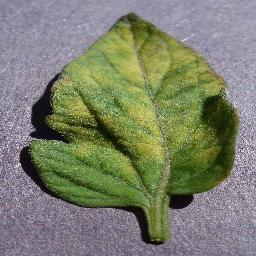

In [8]:
train_ds[0]['image']

In [9]:
id2label = {id: label for id, label in enumerate(train_ds.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}
id2label

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Background_without_leaves',
 5: 'Blueberry___healthy',
 6: 'Cherry___Powdery_mildew',
 7: 'Cherry___healthy',
 8: 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 9: 'Corn___Common_rust',
 10: 'Corn___Northern_Leaf_Blight',
 11: 'Corn___healthy',
 12: 'Grape___Black_rot',
 13: 'Grape___Esca_(Black_Measles)',
 14: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 15: 'Grape___healthy',
 16: 'Orange___Haunglongbing_(Citrus_greening)',
 17: 'Peach___Bacterial_spot',
 18: 'Peach___healthy',
 19: 'Pepper,_bell___Bacterial_spot',
 20: 'Pepper,_bell___healthy',
 21: 'Potato___Early_blight',
 22: 'Potato___Late_blight',
 23: 'Potato___healthy',
 24: 'Raspberry___healthy',
 25: 'Soybean___healthy',
 26: 'Squash___Powdery_mildew',
 27: 'Strawberry___Leaf_scorch',
 28: 'Strawberry___healthy',
 29: 'Tomato___Bacterial_spot',
 30: 'Tomato___Early_blight',
 31: 'Tomato___Late_blight',
 32: 'Toma

In [10]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 32}

array([[[160, 148, 152],
        [161, 149, 153],
        [161, 149, 153],
        ...,
        [145, 129, 130],
        [142, 126, 127],
        [140, 124, 125]],

       [[160, 148, 152],
        [160, 148, 152],
        [160, 148, 152],
        ...,
        [141, 125, 126],
        [139, 123, 124],
        [138, 122, 123]],

       [[162, 150, 154],
        [161, 149, 153],
        [160, 148, 152],
        ...,
        [141, 125, 126],
        [142, 126, 127],
        [142, 126, 127]],

       ...,

       [[151, 144, 151],
        [150, 143, 150],
        [148, 141, 148],
        ...,
        [ 94,  84,  83],
        [ 92,  82,  81],
        [ 92,  82,  81]],

       [[148, 141, 148],
        [147, 140, 147],
        [147, 140, 147],
        ...,
        [ 93,  83,  82],
        [ 92,  82,  81],
        [ 91,  81,  80]],

       [[144, 137, 144],
        [144, 137, 144],
        [145, 138, 145],
        ...,
        [ 93,  83,  82],
        [ 92,  82,  81],
        [ 91,  81,  80]]], dtype=uint8)
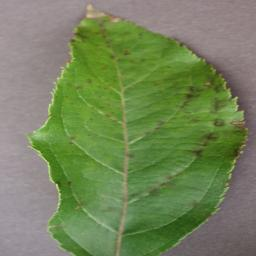

In [11]:
#Converts image to a numpy array
image_array = tf.keras.utils.img_to_array(dataset[0]['image'], dtype=np.uint8)
image_array

In [12]:
#Transforms the image
def train_transforms(examples):
    #Stores shape, dtype, and numpy array into pixel values
    examples['pixel_values'] = [tf.convert_to_tensor(tf.keras.utils.img_to_array(image.resize([192,192]).convert("RGB"))) for image in examples['image']]
    #stores labes in labels
    examples["labels"] = examples["label"]
    return examples

In [13]:
#applies transform to images in dataset
prepared_train_ds = train_ds.with_transform(train_transforms)

In [14]:
prepared_train_ds[1000]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 30,
 'pixel_values': <tf.Tensor: shape=(192, 192, 3), dtype=float32, numpy=
 array([[[178., 177., 183.],
         [179., 178., 184.],
         [181., 180., 186.],
         ...,
         [128., 126., 129.],
         [127., 125., 128.],
         [126., 124., 127.]],
 
        [[181., 180., 186.],
         [181., 180., 186.],
         [181., 180., 186.],
         ...,
         [132., 130., 133.],
         [126., 124., 127.],
         [118., 116., 119.]],
 
        [[185., 184., 190.],
         [185., 184., 190.],
         [183., 182., 188.],
         ...,
         [132., 130., 133.],
         [135., 133., 136.],
         [133., 131., 134.]],
 
        ...,
 
        [[179., 175., 174.],
         [179., 175., 174.],
         [180., 176., 175.],
         ...,
         [137., 125., 125.],
         [135., 123., 123.],
         [135., 123., 123.]],
 
        [[181., 177., 176.],
         [180., 176., 175.],
  

In [15]:
prepared_train_ds[0]['pixel_values'].shape

TensorShape([192, 192, 3])

In [16]:
tf_ds = prepared_train_ds.to_tf_dataset(
            columns=["pixel_values"],
            label_cols=["labels"],
            batch_size=2,
            shuffle=True
            )

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:401: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [110]:
num_classes = len(id2label)
img_height,img_width = (192,192)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [111]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 192, 192, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 192, 192, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (None, 192, 192, 3)       0         
 otation)                                                        
                                                                 
 conv2d_6 (Conv2D)           (None, 192, 192, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 96, 96, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 32)       

In [113]:
prepared_test_ds = test_ds.with_transform(train_transforms)
val_ds = prepared_test_ds.to_tf_dataset(
            columns=["pixel_values"],
            label_cols=["labels"],
            batch_size=2,
            shuffle=True
            )

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:401: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [114]:
prepared_test_ds[0]['pixel_values'].shape

TensorShape([192, 192, 3])

In [115]:
model.fit(
    tf_ds,
    validation_data = val_ds,
    epochs=3
)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24951/24951 [==============================] - 371s 15ms/step - loss: 1.3427 - sparse_categorical_accuracy: 0.6057 - val_loss: 0.8691 - val_sparse_categorical_accuracy: 0.7212
Epoch 2/3
24951/24951 [==============================] - 364s 15ms/step - loss: 0.7690 - sparse_categorical_accuracy: 0.7646 - val_loss: 0.6223 - val_sparse_categorical_accuracy: 0.7993
Epoch 3/3
24951/24951 [==============================] - 351s 14ms/step - loss: 0.6187 - sparse_categorical_accuracy: 0.8094 - val_loss: 0.6206 - val_sparse_categorical_accuracy: 0.8168


In [116]:
model.save('sparse_categorical_model.keras')

In [26]:
from PIL import Image


In [71]:
class_names = []
for label in id2label.values():
  class_names.append(label)
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

In [158]:
img = Image.open('/content/cherry_powdery_mildew.jpeg').convert("RGB")
img = img.resize((192,192),resample=Image.BILINEAR)
img_array = tf.keras.utils.img_to_array(img, dtype=np.uint8)
img_array = img_array[np.newaxis]

In [159]:
prediction = model.predict(img_array)
test_label = class_names[np.argmax(prediction[0])]
test_label

1/1 [==============================] - 0s 17ms/step


'Corn___Cercospora_leaf_spot Gray_leaf_spot'

In [154]:
test_image = prepared_train_ds[55]['pixel_values']
test_image = test_image[np.newaxis]
test_image.shape
test_prediction = model.predict(test_image)
test_label = class_names[np.argmax(test_prediction[0])]
test_label

1/1 [==============================] - 0s 19ms/step


'Cherry___Powdery_mildew'

In [155]:
class_names[prepared_train_ds[55]['label']]

'Cherry___Powdery_mildew'

In [63]:
prediction

array([[ -57.015057,  -46.082966, -136.12328 ,  -52.620167,  -43.695625,
         -58.388718,  -49.44812 ,  -38.584373,  -65.35738 ,  -56.062866,
         -51.108486,  -62.23761 ,  -57.893578,  -63.701694,  -59.46112 ,
         -69.30557 ,  -42.638092,  -42.067024,  -59.849148,  -38.358448,
         -46.63947 ,  -62.886856,  -53.87813 ,  -83.640396,  -72.49946 ,
         -44.4132  ,  -57.927216,  -53.796528,  -73.5404  ,  -51.482594,
         -48.08112 ,  -38.56119 ,  -60.529724,  -48.37948 ,  -63.181892,
         -64.05772 ,  -57.92366 , -134.88152 ,  -88.1551  ]],
      dtype=float32)